Importing:

In [46]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [47]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [48]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [49]:
# Read the JSON file
with open('../DL_notebooks/configs/model_configs.json', 'r') as model_config_file:
    model_configs = json.load(model_config_file)

# Assuming you want to work with the first configuration in the list
for config in model_configs:
    if config['model-architecture'] == 'ResNet':
        epochs = config['epoch-count']
        optimizer_lr = config['optimizer-lr']

        # Create a ResNet model based on the configuration
        num_classes = config['resnet-model-hyperparameters']['num_classes']
        layers = config['resnet-model-hyperparameters']['layers']
        model = MRI_ResNet(BasicBlock, layers, num_classes) 

        if config['loss-function'] == 'cross-entropy':
            criterion = nn.CrossEntropyLoss()

        if config['optimizer'] == 'adam':
            optimizer = optim.Adam(model.parameters(), lr=optimizer_lr)

        # Move the model to the device (assuming you have defined 'device' earlier)
        model = model.to(device)


In [50]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:06<01:57,  6.20s/epoch]

Epoch [1/20] Train Loss: 0.9946 Train Accuracy: 61.01% Validation Loss: 2.1208 Validation Accuracy: 42.49%


Training:  10%|█         | 2/20 [00:12<01:49,  6.09s/epoch]

Epoch [2/20] Train Loss: 0.5830 Train Accuracy: 78.24% Validation Loss: 1.4508 Validation Accuracy: 58.97%


Training:  15%|█▌        | 3/20 [00:18<01:42,  6.03s/epoch]

Epoch [3/20] Train Loss: 0.3069 Train Accuracy: 90.74% Validation Loss: 0.8367 Validation Accuracy: 72.21%


Training:  20%|██        | 4/20 [00:24<01:36,  6.01s/epoch]

Epoch [4/20] Train Loss: 0.1670 Train Accuracy: 95.64% Validation Loss: 1.4527 Validation Accuracy: 62.84%


Training:  25%|██▌       | 5/20 [00:30<01:29,  6.00s/epoch]

Epoch [5/20] Train Loss: 0.1310 Train Accuracy: 97.04% Validation Loss: 1.0069 Validation Accuracy: 74.80%


Training:  30%|███       | 6/20 [00:36<01:23,  6.00s/epoch]

Epoch [6/20] Train Loss: 0.0795 Train Accuracy: 98.38% Validation Loss: 0.6225 Validation Accuracy: 82.55%


Training:  35%|███▌      | 7/20 [00:42<01:17,  5.97s/epoch]

Epoch [7/20] Train Loss: 0.0465 Train Accuracy: 99.08% Validation Loss: 0.7259 Validation Accuracy: 74.96%


Training:  40%|████      | 8/20 [00:47<01:11,  5.95s/epoch]

Epoch [8/20] Train Loss: 0.0651 Train Accuracy: 98.98% Validation Loss: 0.7354 Validation Accuracy: 79.16%


Training:  45%|████▌     | 9/20 [00:53<01:05,  5.93s/epoch]

Epoch [9/20] Train Loss: 0.0913 Train Accuracy: 98.55% Validation Loss: 0.9171 Validation Accuracy: 75.77%


Training:  50%|█████     | 10/20 [00:59<00:59,  5.92s/epoch]

Epoch [10/20] Train Loss: 0.0632 Train Accuracy: 98.76% Validation Loss: 0.6509 Validation Accuracy: 81.10%


Training:  55%|█████▌    | 11/20 [01:05<00:53,  5.91s/epoch]

Epoch [11/20] Train Loss: 0.0628 Train Accuracy: 98.33% Validation Loss: 0.7192 Validation Accuracy: 79.48%


Training:  60%|██████    | 12/20 [01:11<00:47,  5.90s/epoch]

Epoch [12/20] Train Loss: 0.0448 Train Accuracy: 98.87% Validation Loss: 0.8923 Validation Accuracy: 74.64%


Training:  65%|██████▌   | 13/20 [01:17<00:41,  5.90s/epoch]

Epoch [13/20] Train Loss: 0.0537 Train Accuracy: 99.89% Validation Loss: 0.5823 Validation Accuracy: 82.71%


Training:  70%|███████   | 14/20 [01:23<00:35,  5.90s/epoch]

Epoch [14/20] Train Loss: 0.0490 Train Accuracy: 99.62% Validation Loss: 0.5384 Validation Accuracy: 85.78%


Training:  75%|███████▌  | 15/20 [01:29<00:29,  5.99s/epoch]

Epoch [15/20] Train Loss: 0.0237 Train Accuracy: 99.89% Validation Loss: 0.6263 Validation Accuracy: 84.49%


Training:  80%|████████  | 16/20 [01:35<00:24,  6.04s/epoch]

Epoch [16/20] Train Loss: 0.0417 Train Accuracy: 99.95% Validation Loss: 0.6340 Validation Accuracy: 85.95%


Training:  85%|████████▌ | 17/20 [01:41<00:18,  6.04s/epoch]

Epoch [17/20] Train Loss: 0.0401 Train Accuracy: 99.14% Validation Loss: 0.5798 Validation Accuracy: 82.55%


Training:  90%|█████████ | 18/20 [01:47<00:12,  6.03s/epoch]

Epoch [18/20] Train Loss: 0.0512 Train Accuracy: 99.19% Validation Loss: 0.7449 Validation Accuracy: 79.32%


Training:  95%|█████████▌| 19/20 [01:53<00:06,  6.02s/epoch]

Epoch [19/20] Train Loss: 0.0640 Train Accuracy: 98.55% Validation Loss: 0.8715 Validation Accuracy: 78.19%


Training: 100%|██████████| 20/20 [01:59<00:00,  5.98s/epoch]

Epoch [20/20] Train Loss: 0.0731 Train Accuracy: 98.60% Validation Loss: 1.0510 Validation Accuracy: 78.84%


In [51]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:00<00:18,  1.03epoch/s]

Testing Epoch [1/20] Test Loss: 1.0480 Test Accuracy: 77.58% Time per Epoch: 0.97 seconds


Testing:  10%|█         | 2/20 [00:01<00:16,  1.07epoch/s]

Testing Epoch [2/20] Test Loss: 1.0255 Test Accuracy: 77.58% Time per Epoch: 0.91 seconds


Testing:  15%|█▌        | 3/20 [00:02<00:15,  1.09epoch/s]

Testing Epoch [3/20] Test Loss: 1.0071 Test Accuracy: 77.58% Time per Epoch: 0.90 seconds


Testing:  20%|██        | 4/20 [00:03<00:14,  1.08epoch/s]

Testing Epoch [4/20] Test Loss: 1.0209 Test Accuracy: 77.58% Time per Epoch: 0.93 seconds


Testing:  25%|██▌       | 5/20 [00:04<00:13,  1.10epoch/s]

Testing Epoch [5/20] Test Loss: 1.0506 Test Accuracy: 77.58% Time per Epoch: 0.88 seconds


Testing:  30%|███       | 6/20 [00:05<00:12,  1.10epoch/s]

Testing Epoch [6/20] Test Loss: 1.0086 Test Accuracy: 77.58% Time per Epoch: 0.89 seconds


Testing:  35%|███▌      | 7/20 [00:06<00:11,  1.10epoch/s]

Testing Epoch [7/20] Test Loss: 1.0441 Test Accuracy: 77.58% Time per Epoch: 0.92 seconds


Testing:  40%|████      | 8/20 [00:07<00:10,  1.10epoch/s]

Testing Epoch [8/20] Test Loss: 1.0422 Test Accuracy: 77.58% Time per Epoch: 0.90 seconds


Testing:  45%|████▌     | 9/20 [00:08<00:09,  1.10epoch/s]

Testing Epoch [9/20] Test Loss: 1.0340 Test Accuracy: 77.58% Time per Epoch: 0.91 seconds


Testing:  50%|█████     | 10/20 [00:09<00:09,  1.07epoch/s]

Testing Epoch [10/20] Test Loss: 1.0199 Test Accuracy: 77.58% Time per Epoch: 0.99 seconds


Testing:  55%|█████▌    | 11/20 [00:10<00:08,  1.04epoch/s]

Testing Epoch [11/20] Test Loss: 1.0713 Test Accuracy: 77.58% Time per Epoch: 1.02 seconds


Testing:  60%|██████    | 12/20 [00:11<00:07,  1.06epoch/s]

Testing Epoch [12/20] Test Loss: 1.0317 Test Accuracy: 77.58% Time per Epoch: 0.91 seconds


Testing:  65%|██████▌   | 13/20 [00:12<00:06,  1.07epoch/s]

Testing Epoch [13/20] Test Loss: 1.0133 Test Accuracy: 77.58% Time per Epoch: 0.91 seconds


Testing:  70%|███████   | 14/20 [00:12<00:05,  1.08epoch/s]

Testing Epoch [14/20] Test Loss: 1.0139 Test Accuracy: 77.58% Time per Epoch: 0.90 seconds


Testing:  75%|███████▌  | 15/20 [00:13<00:04,  1.09epoch/s]

Testing Epoch [15/20] Test Loss: 1.0403 Test Accuracy: 77.58% Time per Epoch: 0.91 seconds


Testing:  80%|████████  | 16/20 [00:14<00:03,  1.09epoch/s]

Testing Epoch [16/20] Test Loss: 1.0293 Test Accuracy: 77.58% Time per Epoch: 0.89 seconds


Testing:  85%|████████▌ | 17/20 [00:15<00:02,  1.09epoch/s]

Testing Epoch [17/20] Test Loss: 1.0379 Test Accuracy: 77.58% Time per Epoch: 0.92 seconds


Testing:  90%|█████████ | 18/20 [00:16<00:01,  1.09epoch/s]

Testing Epoch [18/20] Test Loss: 1.0124 Test Accuracy: 77.58% Time per Epoch: 0.93 seconds


Testing:  95%|█████████▌| 19/20 [00:17<00:00,  1.09epoch/s]

Testing Epoch [19/20] Test Loss: 1.0441 Test Accuracy: 77.58% Time per Epoch: 0.90 seconds


Testing: 100%|██████████| 20/20 [00:18<00:00,  1.08epoch/s]

Testing Epoch [20/20] Test Loss: 1.0624 Test Accuracy: 77.58% Time per Epoch: 0.92 seconds
Average Test Loss: 1.0329
Average Test Accuracy: 77.58%


Model Classification:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       546
           1       0.98      0.98      0.98       560
           2       0.99      1.00      0.99       254
           3       0.98      0.98      0.98       497

    accuracy                           0.99      1857
   macro avg       0.99      0.99      0.99      1857
weighted avg       0.99      0.99      0.99      1857

              precision    recall  f1-score   support

           0       0.99      0.54      0.70       169
           1       0.71      0.83      0.76       175
           2       0.96      0.78      0.86        97
           3       0.72      0.99      0.84       178

    accuracy                           0.79       619
   macro avg       0.85      0.78      0.79       619
weighted avg       0.83      0.79      0.78       619

              precision    recall  f1-score   support

           0       0.98      0.59      0.73       186
           1       0.

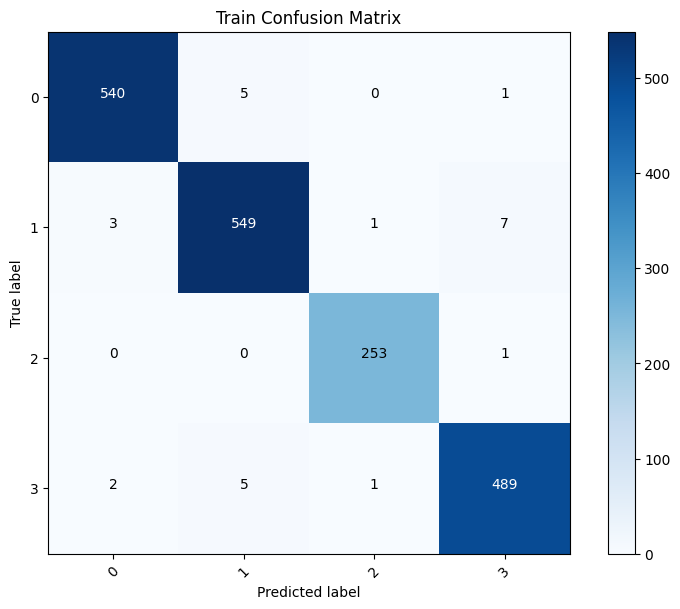

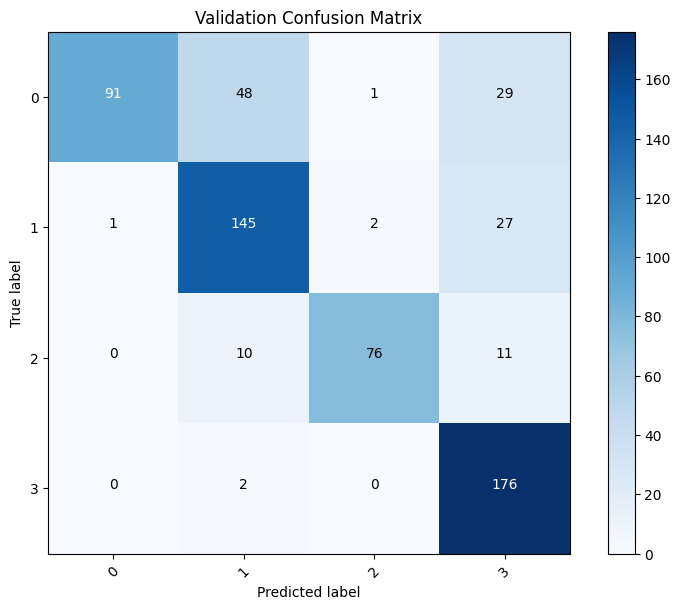

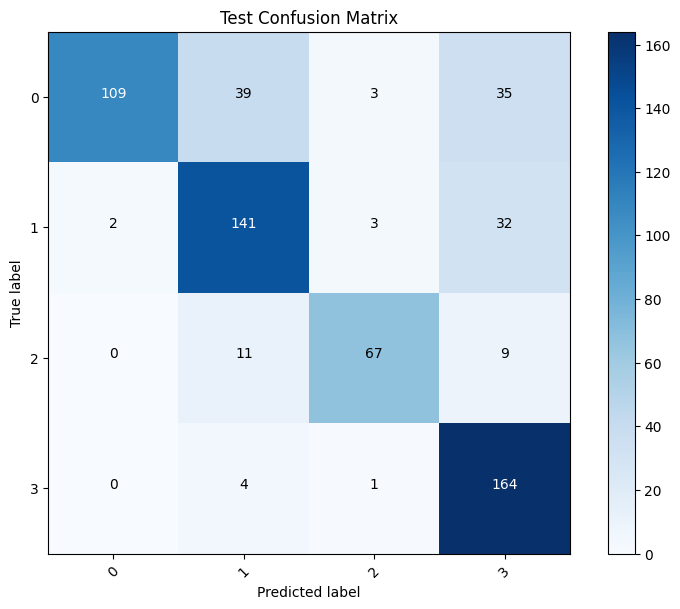

In [52]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()